# Marketing analysis of ecomm store

Dataset - https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fvivek468%2Fsuperstore-dataset-final

In [3]:
!pip install kaggle
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vivek468/superstore-dataset-final
!unzip superstore-dataset-final.zip



Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other
superstore-dataset-final.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  superstore-dataset-final.zip
replace Sample - Superstore.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: Sample - Superstore.csv  


In [10]:
import pandas as pd
data = pd.read_csv('superstore.csv', encoding='latin1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Which states have the most sales?

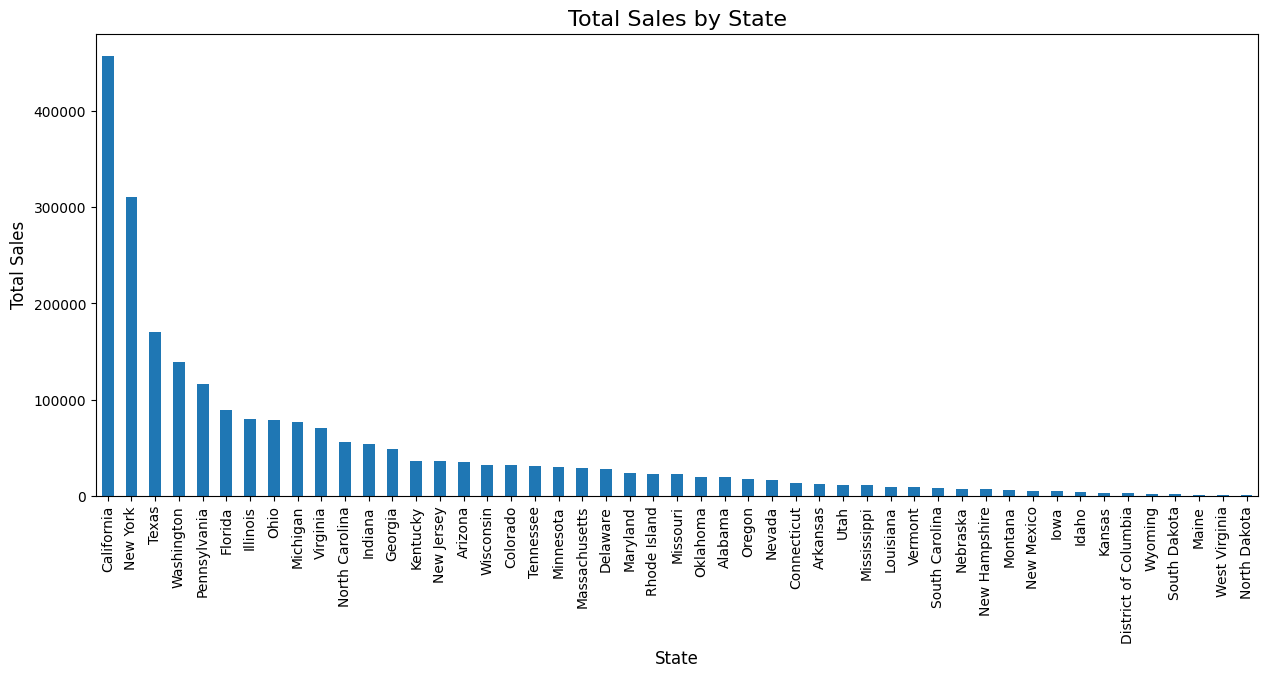

In [22]:
import matplotlib.pyplot as plt

# Step 1: Group by "State" and calculate total sales for each state
state_sales = data.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Step 2: Visualize the top states by total sales
plt.figure(figsize=(15, 6))
state_sales.plot(kind = 'bar')


plt.title('Total Sales by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.show()


What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)

Logic:
1. Filter the data for 2 states
2. Group by state and calculate the total sales and profit per state
3. Visualize the comparison using bar chart

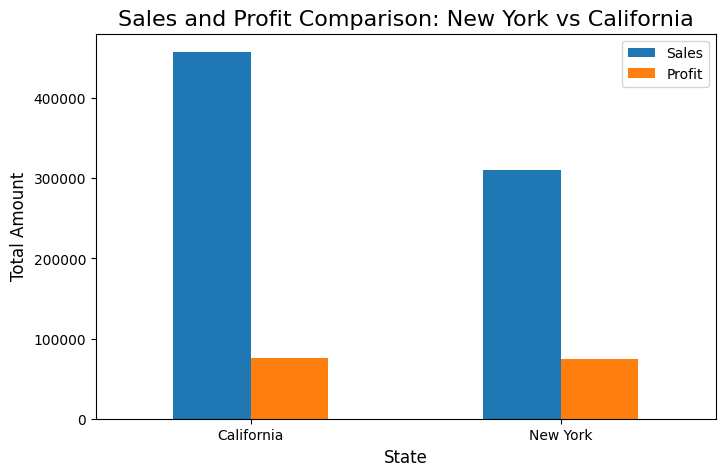

In [27]:
# Step 1: Filter the rows containing New York OR California
states_data = data[data['State'].isin(['New York', 'California'])]

# Step 2: Group by "State" and calculate total sales and total profit
sales_profit_by_state = states_data.groupby('State')[['Sales', 'Profit']].sum()

# Step 3: Visualize the comparison of sales and profit between New York and California
sales_profit_by_state.plot(kind='bar', figsize=(8, 5))

# Step 4: Add labels and title to the plot
plt.title('Sales and Profit Comparison: New York vs California', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)


plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()


Wow , NYC is brining comaprable amount of profit with 25% less sales quantity. This suggests that California might have higher operational costs or more discounts, leading to lower profit margins relative to its sales.

So let's check who is an outstanding customer (generating most revenue) in New York?

**LOGIC**

Filter the data to include only customers from New York.

Group by "Customer Name" and calculate the total sales and profit for each customer.

Find the customer with the highest sales or profit.

Visualize the top customers in New York based on sales.

Outstanding customer in New York based on Sales: Tom Ashbrook
Outstanding customer in New York based on Profit: Tom Ashbrook


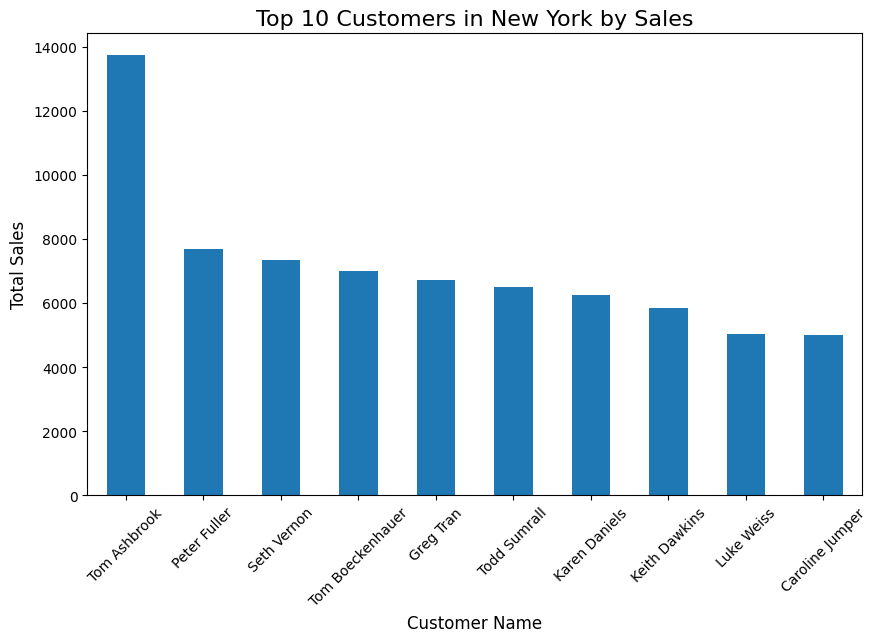

In [28]:
# Filter the data for New York customers
ny_customers = data[data['State'] == 'New York']

# Group by "Customer Name" and calculate total sales and total profit
ny_customer_sales_profit = ny_customers.groupby('Customer Name')[['Sales', 'Profit']].sum()

# Find the customer with the highest sales and highest profit separately
top_ny_customer_sales = ny_customer_sales_profit['Sales'].idxmax()
top_ny_customer_profit = ny_customer_sales_profit['Profit'].idxmax()

# Print the winners of those 2 categories
print(f"Outstanding customer in New York based on Sales: {top_ny_customer_sales}")
print(f"Outstanding customer in New York based on Profit: {top_ny_customer_profit}")

# Visualize the top 10 customers in New York by sales
top_10_ny_customers = ny_customer_sales_profit.sort_values(by='Sales', ascending=False).head(10)

# Plot the top 10 customers by sales
top_10_ny_customers['Sales'].plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Top 10 Customers in New York by Sales', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()


If we want to show both sales and both profit side by side - we can create a grouped bar chart

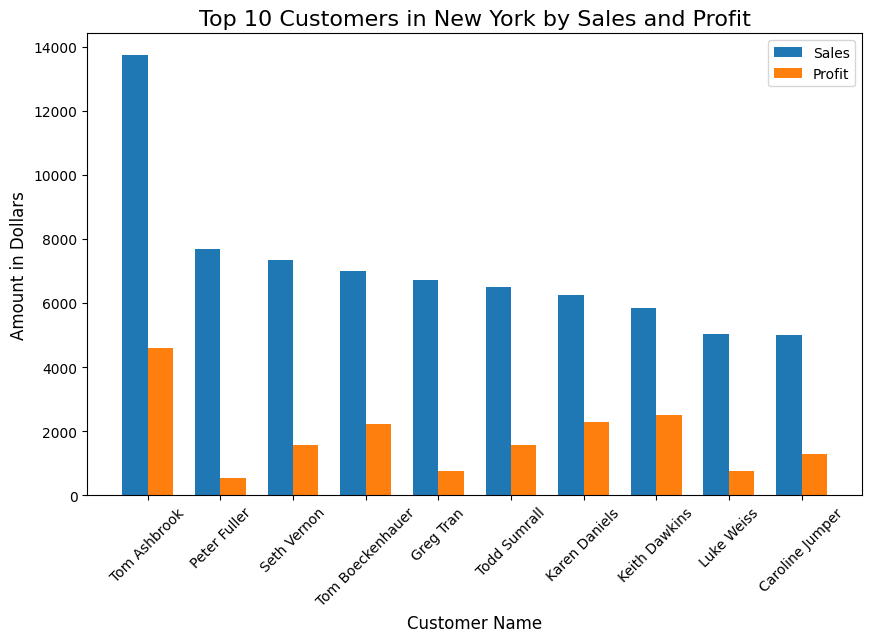

In [29]:
import numpy as np

# Step 1: Filter the data for New York customers
ny_customers = data[data['State'] == 'New York']

# Step 2: Group by "Customer Name" and calculate total sales and total profit
ny_customer_sales_profit = ny_customers.groupby('Customer Name')[['Sales', 'Profit']].sum()

# Step 3: Sort by sales and get the top 10 customers by sales
top_10_ny_customers = ny_customer_sales_profit.sort_values(by='Sales', ascending=False).head(10)

# Step 4: Create a grouped bar plot for sales and profit
ind = np.arange(len(top_10_ny_customers))  # the x locations for the groups
width = 0.35  # the width of the bars

# Create the plot
plt.figure(figsize=(10, 6))

# Plot sales
plt.bar(ind, top_10_ny_customers['Sales'], width, label='Sales')

# Plot profit, shifting it by `width` so it appears next to the sales bars
plt.bar(ind + width, top_10_ny_customers['Profit'], width, label='Profit')

# Step 5: Add labels and title
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Amount in Dollars', fontsize=12)
plt.title('Top 10 Customers in New York by Sales and Profit', fontsize=16)

# Add xticks for each customer name, rotating for readability
plt.xticks(ind + width / 2, top_10_ny_customers.index, rotation=45)

# Add a legend to differentiate between sales and profit
plt.legend()

plt.show()


Are there any differences among states in profitability?

**LOGIC**

1. Calculate the total profit and total sales for each state.

2. Calculate the profitability for each state. Profitability can be defined as the ratio of profit to sales, i.e., how much profit is generated per unit of sales.

3. Visualize the profitability for each state to observe any differences.


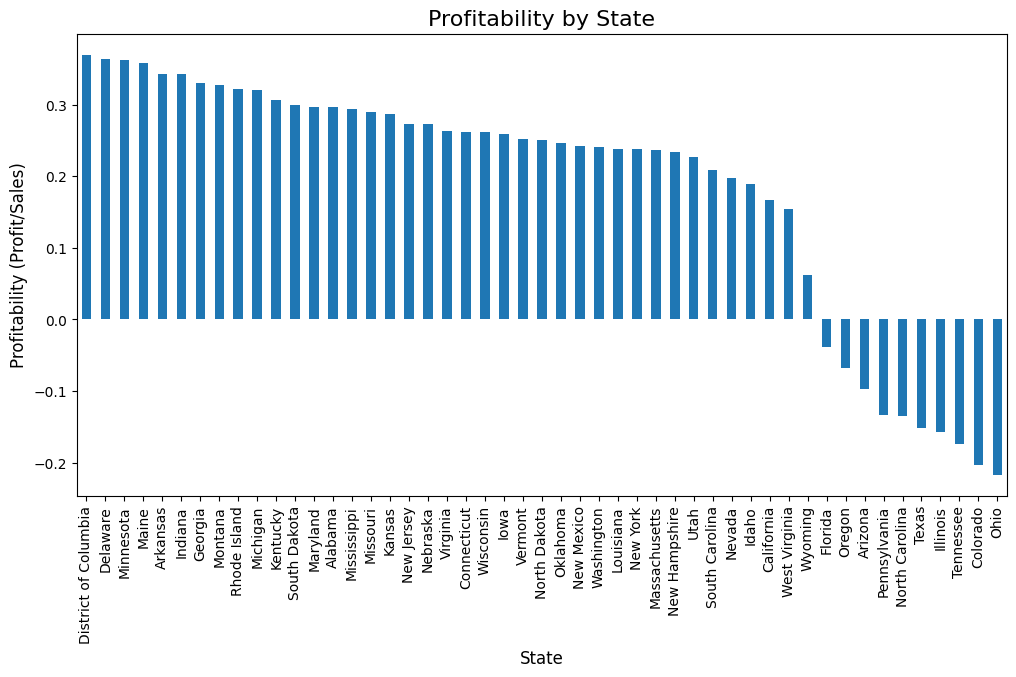

In [31]:
# Step 1: Group by "State" and calculate total sales and total profit
state_sales_profit = data.groupby('State')[['Sales', 'Profit']].sum()

# Step 2: Calculate profitability (Profit / Sales) for each state
state_sales_profit['Profitability'] = state_sales_profit['Profit'] / state_sales_profit['Sales']

# Step 3: Sort states by profitability
state_sales_profit_sorted = state_sales_profit.sort_values(by='Profitability', ascending=False)

# Step 4: Visualize profitability by state
plt.figure(figsize=(12, 6))
state_sales_profit_sorted['Profitability'].plot(kind='bar')

plt.title('Profitability by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Profitability (Profit/Sales)', fontsize=12)

plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)

To see this we need to know how much profit in % every customer brought. And then let's see how much profit do TOP 20% of customers bring or we can do some more complex things as shown below. I EXCLUDED customers that generated loss.

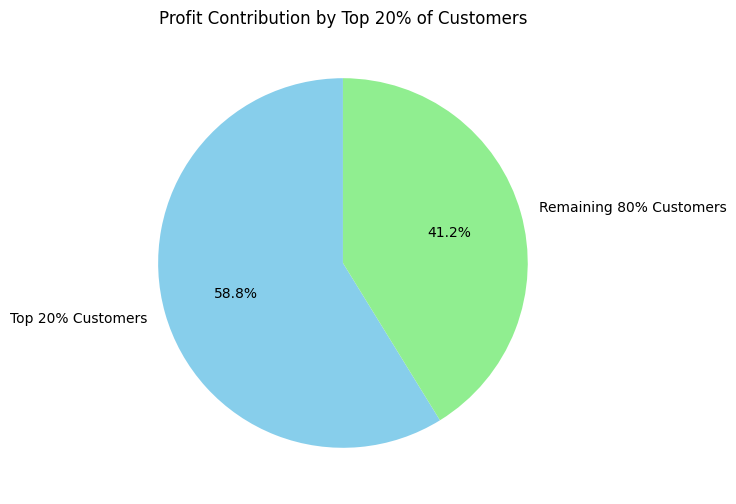

Top 20% of customers contribute 58.80% of the total profit.


In [35]:
# Group by "Customer Name" and calculate total profit for each customer
customer_profit = data.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)

#Exclude customers who generated a loss
customer_profit = customer_profit[customer_profit > 0]

#Who are the top 20% of customers
top_20_percent_customers_count = int(0.2 * len(customer_profit))

#Calculate profit contribution of the top 20% customers
top_20_percent_profit = customer_profit.iloc[:top_20_percent_customers_count].sum()
total_profit = customer_profit.sum()

# Calculate the percentage of profit from top 20% customers
top_20_percent_profit_percentage = (top_20_percent_profit / total_profit) * 100

# Visualize the profit contribution
labels = ['Top 20% Customers', 'Remaining 80% Customers']
sizes = [top_20_percent_profit_percentage, 100 - top_20_percent_profit_percentage]
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Profit Contribution by Top 20% of Customers')
plt.show()

# Step 5: Print the percentage of profit from the top 20% customers
print(f"Top 20% of customers contribute {top_20_percent_profit_percentage:.2f}% of the total profit.")


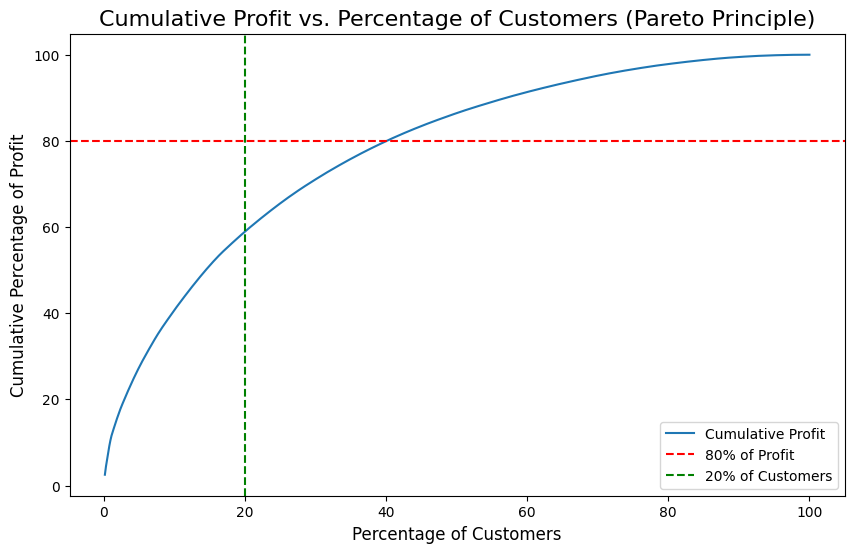

Top 20% of customers contribute 58.80% of the profit.


In [33]:
# Step 1: Group by "Customer Name" and calculate total profit for each customer, removing negative profits
customer_profit = data.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)

# Step 2: Filter out customers with negative profits
customer_profit = customer_profit[customer_profit > 0]

# Step 3: Calculate cumulative profit and cumulative percentage of customers
customer_profit_cumsum = customer_profit.cumsum()  # Cumulative sum of profits
total_profit = customer_profit.sum()  # Total positive profit
customer_profit_cumsum_percentage = customer_profit_cumsum / total_profit * 100  # Cumulative percentage of total profit

# Step 4: Cap the cumulative profit at 100%
customer_profit_cumsum_percentage = np.clip(customer_profit_cumsum_percentage, 0, 100)

# Step 5: Calculate the cumulative percentage of customers
num_customers = len(customer_profit)
customer_percentage = np.arange(1, num_customers + 1) / num_customers * 100  # Cumulative percentage of customers

# Step 6: Visualize the cumulative profit curve
plt.figure(figsize=(10, 6))
plt.plot(customer_percentage, customer_profit_cumsum_percentage, label='Cumulative Profit')

# Plot the 80% profit line and 20% customer line
plt.axhline(y=80, color='r', linestyle='--', label='80% of Profit')
plt.axvline(x=20, color='g', linestyle='--', label='20% of Customers')

# Add labels and title
plt.title('Cumulative Profit vs. Percentage of Customers (Pareto Principle)', fontsize=16)
plt.xlabel('Percentage of Customers', fontsize=12)
plt.ylabel('Cumulative Percentage of Profit', fontsize=12)
plt.legend()

# Show the plot
plt.show()

# Step 7: Check if the top 20% of customers contribute to 80% of the profit
top_20_percent_customers = int(0.2 * num_customers)  # 20% of total customers
profit_contribution_top_20 = customer_profit_cumsum.iloc[top_20_percent_customers - 1]

# Print the result
print(f"Top 20% of customers contribute {profit_contribution_top_20 / total_profit * 100:.2f}% of the profit.")



What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)

**LOGIC**

Calculate the total sales and profit for each city.

Identify the top 20 cities by sales and profit.

Calculate profitability for each city (Profit / Sales).

Analyze and compare profitability differences among the top cities.

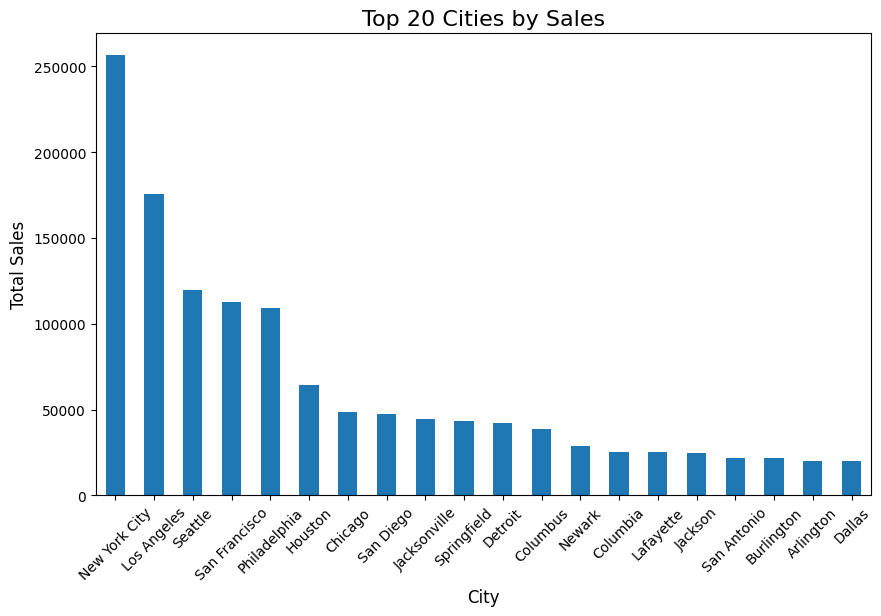

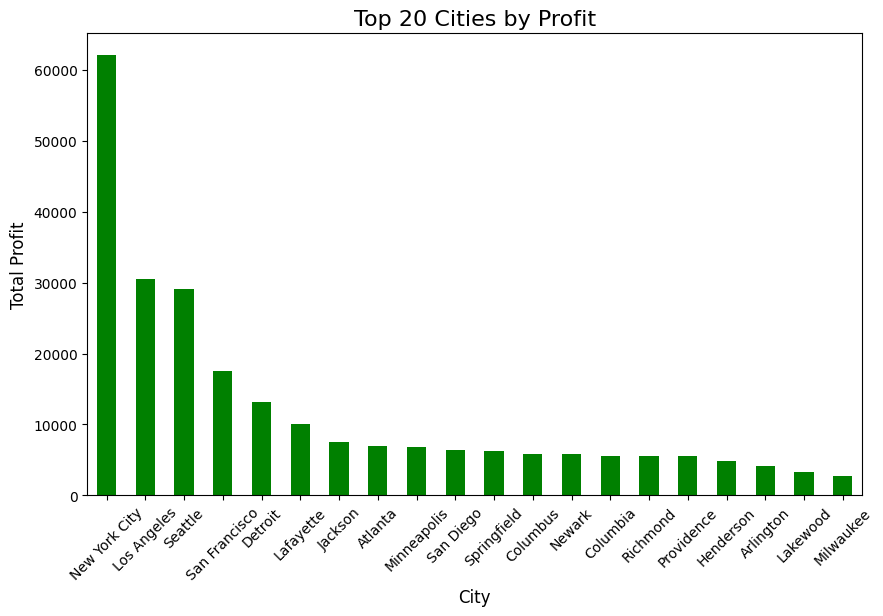

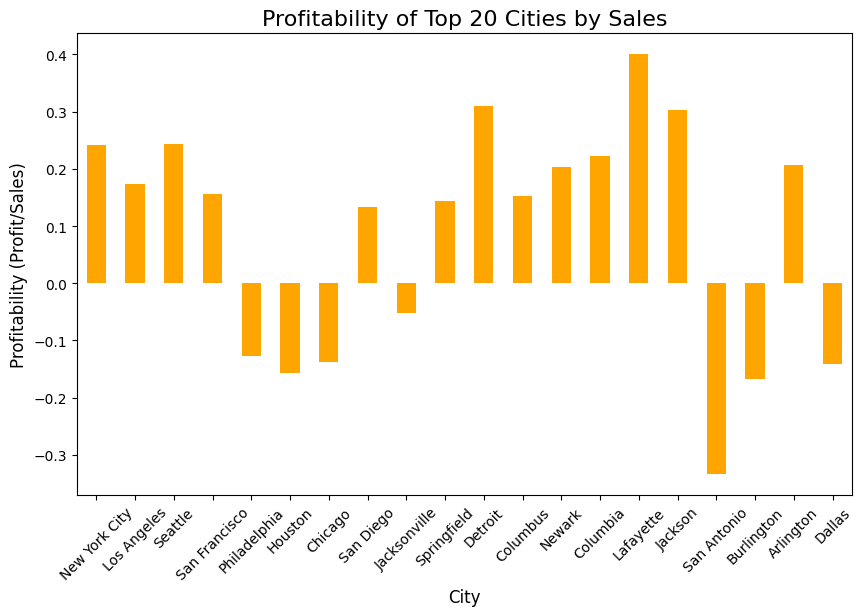

In [37]:
# Step 1: Group by "City" and calculate total sales and total profit for each city
city_sales_profit = data.groupby('City')[['Sales', 'Profit']].sum()

# Step 2: Calculate profitability (Profit / Sales) for each city
city_sales_profit['Profitability'] = city_sales_profit['Profit'] / city_sales_profit['Sales']

# Step 3: Identify the top 20 cities by Sales and by Profit
top_20_cities_by_sales = city_sales_profit.sort_values(by='Sales', ascending=False).head(20)
top_20_cities_by_profit = city_sales_profit.sort_values(by='Profit', ascending=False).head(20)

# Step 4: Visualize the top 20 cities by Sales
plt.figure(figsize=(10, 6))
top_20_cities_by_sales['Sales'].plot(kind='bar')
plt.title('Top 20 Cities by Sales', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Step 5: Visualize the top 20 cities by Profit
plt.figure(figsize=(10, 6))
top_20_cities_by_profit['Profit'].plot(kind='bar', color='green')
plt.title('Top 20 Cities by Profit', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Step 6: Analyze differences in profitability
# Sorting by profitability (not necessarily top 20 by sales/profit)
top_20_cities_by_profitability = city_sales_profit.sort_values(by='Profitability', ascending=False).head(20)

# Step 7: Visualize profitability differences among top 20 cities by Sales
plt.figure(figsize=(10, 6))
top_20_cities_by_sales['Profitability'].plot(kind='bar', color='orange')
plt.title('Profitability of Top 20 Cities by Sales', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Profitability (Profit/Sales)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


What are the Top 20 customers by Sales?

**LOGIC**

Group the data by "Customer Name" and calculate the total sales for each customer.

Sort the customers by total sales in descending order.

Identify and display the top 20 customers by total sales.

Visualize the top 20 customers by sales using a bar plot.

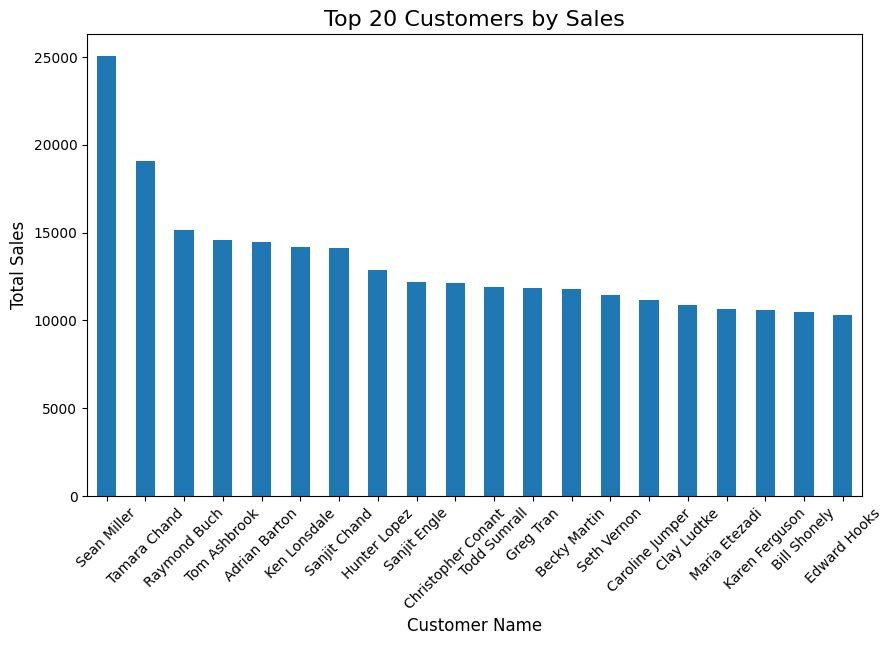

In [38]:
# Step 1: Group by "Customer Name" and calculate total sales for each customer
customer_sales = data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# Step 2: Identify the top 20 customers by sales
top_20_customers_by_sales = customer_sales.head(20)

# Step 3: Visualize the top 20 customers by sales
plt.figure(figsize=(10, 6))
top_20_customers_by_sales.plot(kind='bar')

# Step 4: Add labels and title to the plot
plt.title('Top 20 Customers by Sales', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.show()



Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?

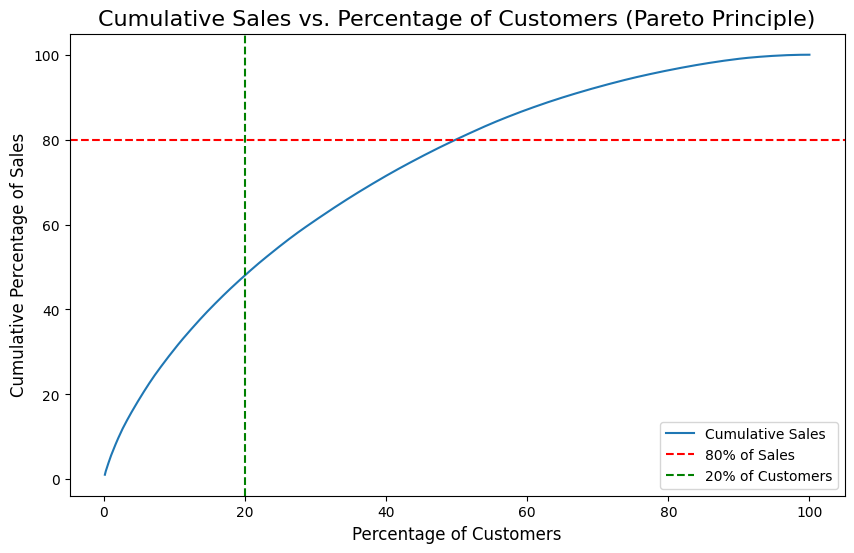

Top 20% of customers contribute 47.96% of the total sales.


In [41]:
# Step 2: Calculate cumulative sales and cumulative percentage of customers
customer_sales_cumsum = customer_sales.cumsum()  # Cumulative sum of sales
total_sales = customer_sales.sum()  # Total sales
customer_sales_cumsum_percentage = customer_sales_cumsum / total_sales * 100  # Cumulative percentage of total sales

# Step 3: Calculate the cumulative percentage of customers
num_customers = len(customer_sales)
customer_percentage = np.arange(1, num_customers + 1) / num_customers * 100  # Cumulative percentage of customers

# Step 4: Visualize the cumulative sales curve
plt.figure(figsize=(10, 6))
plt.plot(customer_percentage, customer_sales_cumsum_percentage, label='Cumulative Sales')

# Plot the 80% sales line and 20% customer line
plt.axhline(y=80, color='r', linestyle='--', label='80% of Sales')
plt.axvline(x=20, color='g', linestyle='--', label='20% of Customers')

# Add labels and title
plt.title('Cumulative Sales vs. Percentage of Customers (Pareto Principle)', fontsize=16)
plt.xlabel('Percentage of Customers', fontsize=12)
plt.ylabel('Cumulative Percentage of Sales', fontsize=12)
plt.legend()

# Display the plot
plt.show()

# Step 6: Determine if the top 20% of customers contribute to 80% of the sales
top_20_percent_customers_count = int(0.2 * num_customers)  # 20% of total customers
sales_contribution_top_20 = customer_sales_cumsum.iloc[top_20_percent_customers_count - 1]

print(f"Top 20% of customers contribute {sales_contribution_top_20 / total_sales * 100:.2f}% of the total sales.")


Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

The top 20 cities by sales and profit show significant potential for both sales retention and expansion. Cities like Los Angeles, New York, and San Francisco are clear leaders, but other cities may have untapped potential based on profitability.